# META METHODS

### IMPORTS

In [15]:
import numpy as np    
import pandas 
import sklearn as sk  
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")

### CARGAR LOS DATOS

In [3]:
X = pandas.read_csv('X.csv', sep=',', na_values="")
y = pandas.read_csv('y.csv', sep=',', na_values="")
print(X.shape)
print(y.shape)

(7375, 1477)
(7375, 1)


### VOTING SCHEME

In [4]:
from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

cv=5

clf1 = MultinomialNB()

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X, y)
print("Best Params fo Knn=",clf.best_params_, "Accuracy=", clf.best_score_)
parval=clf.best_params_
clf2 = KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])

clf3 = DecisionTreeClassifier(criterion='entropy')


for clf, label in zip([clf1, clf2, clf3], ['Naive Bayes','Knn (3)', 'Dec. Tree', ]):
    scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))

Best Params fo Knn= {'n_neighbors': 3, 'weights': 'distance'} Accuracy= 0.5793898305084746
Accuracy: 0.645 [Naive Bayes]
Accuracy: 0.579 [Knn (3)]
Accuracy: 0.603 [Dec. Tree]


### HARD

In [5]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)], voting='hard')
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

Accuracy: 0.639 [Majority Voting]


### SOFT

In [6]:
eclf = VotingClassifier(estimators=[('nb', clf1), ('knn3', clf2), ('dt', clf3)],voting='soft', weights=[2.5,1.5,2])
scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

Accuracy: 0.635 [Weighted Voting]


### BAGGING

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

lb = []
for nest in [1,2,5,10,20]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb.append(scores.mean())

lb2 = []
print()
for nest in [1,2,5,10,20]:
    scores = cross_val_score(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=nest, max_features=0.35), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lb2.append(scores.mean())


Accuracy: 0.617 [1]
Accuracy: 0.600 [2]
Accuracy: 0.623 [5]
Accuracy: 0.632 [10]
Accuracy: 0.635 [20]

Accuracy: 0.582 [1]
Accuracy: 0.576 [2]
Accuracy: 0.617 [5]
Accuracy: 0.636 [10]
Accuracy: 0.648 [20]


### RANDOM FOREST

In [8]:
from sklearn.ensemble import RandomForestClassifier

lrf=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(RandomForestClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lrf.append(scores.mean())

Accuracy: 0.608 [1]
Accuracy: 0.602 [2]
Accuracy: 0.621 [5]
Accuracy: 0.640 [10]
Accuracy: 0.648 [20]


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

lext=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(ExtraTreesClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lext.append(scores.mean())

Accuracy: 0.606 [1]
Accuracy: 0.599 [2]
Accuracy: 0.636 [5]
Accuracy: 0.637 [10]
Accuracy: 0.638 [20]


### BOOSTING

In [11]:
from sklearn.ensemble import AdaBoostClassifier

lboo=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(AdaBoostClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboo.append(scores.mean())

Accuracy: 0.555 [1]
Accuracy: 0.549 [2]
Accuracy: 0.565 [5]
Accuracy: 0.604 [10]
Accuracy: 0.612 [20]


In [12]:
from sklearn.ensemble import AdaBoostClassifier

lboodt=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 0.569 [1]
Accuracy: 0.597 [2]
Accuracy: 0.631 [5]
Accuracy: 0.641 [10]
Accuracy: 0.644 [20]


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

lgbboo=[]
for nest in [1,2,5,10,20]:
    scores = cross_val_score(GradientBoostingClassifier(n_estimators=nest), X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.559 [1]
Accuracy: 0.562 [2]
Accuracy: 0.568 [5]
Accuracy: 0.595 [10]
Accuracy: 0.612 [20]


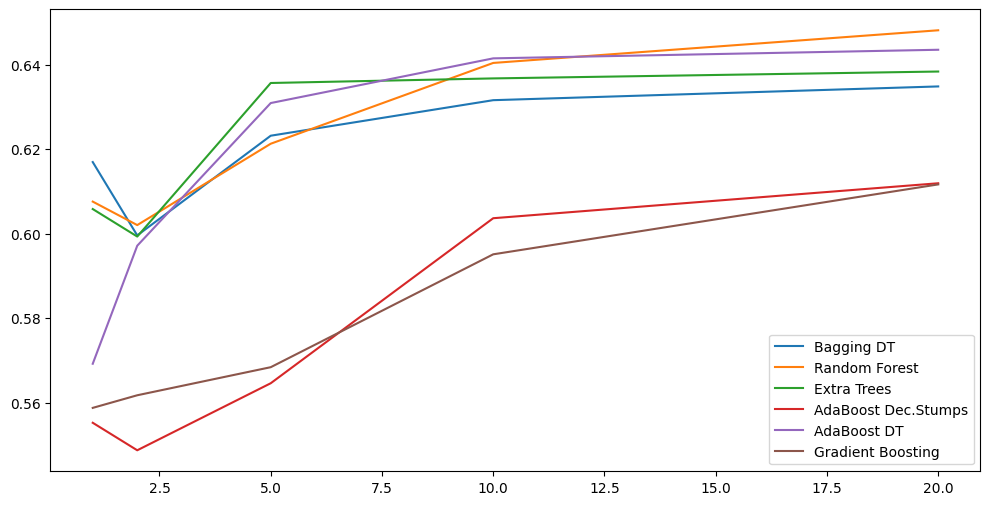

In [14]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot([1,2,5,10,20],lb,label="Bagging DT")
plt.plot([1,2,5,10,20],lrf,label="Random Forest")
plt.plot([1,2,5,10,20],lext,label="Extra Trees")
plt.plot([1,2,5,10,20],lboo,label="AdaBoost Dec.Stumps")
plt.plot([1,2,5,10,20],lboodt,label="AdaBoost DT")
plt.plot([1,2,5,10,20],lgbboo,label="Gradient Boosting")
plt.legend(loc='lower right')

plt.show()

RESULTATS RANDOM FOREST: 
Accuracy en validació creuada: 0.7146439656335747

 INFORME MODEL RANDOM FOREST 

              precision    recall  f1-score   support

       mucho       0.72      0.70      0.71      1113
        poco       0.71      0.73      0.72      1100

    accuracy                           0.71      2213
   macro avg       0.71      0.71      0.71      2213
weighted avg       0.72      0.71      0.71      2213


MATRIU DE CONFUSIÓ 


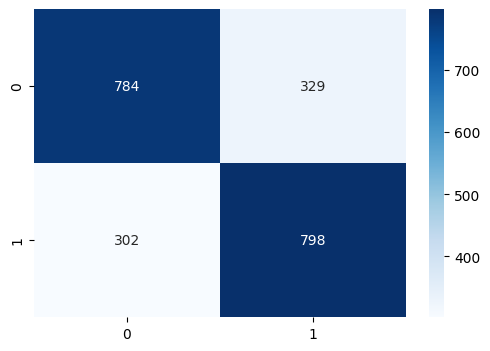


 RESULTATS MODEL
Accuracy:  0.7148666967916855


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("RESULTATS RANDOM FOREST: ")

# Entrenamos el modelo con n_estimators=20
nest = 20
model = RandomForestClassifier(n_estimators=nest)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
accuracy = scores.mean()
print("Accuracy en validació creuada:", accuracy)

# Entrenamiento del modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Informe de Classificació
print('\n INFORME MODEL RANDOM FOREST \n')
print(classification_report(y_test, pred))

# Matriu de Confusió
cm = confusion_matrix(y_test, pred)
print("\nMATRIU DE CONFUSIÓ ")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

# Resultats del Model
print("\n RESULTATS MODEL")
print("Accuracy: ", accuracy_score(y_test, pred))
